<a href="https://colab.research.google.com/github/albin2122/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Credit Card Default Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

Despite high returns, credit cards carry significant risks. The ever-expanding number of credit cards has achieved an expansion in how much credit card defaults and the subsequent enormous measure of bills and repayment data information have likewise carried specific hardships to the risk controllers. As a result, one of the primary concerns of banks is how to use the data generated by users and extract useful information to control risks, reduce the default rate, and control the growth of non-performing assets. \
The goal of credit card default prediction is to help credit card companies and lenders to better manage their risk and minimize losses. By predicting which credit card users are likely to default on their payments, lenders can take proactive steps to mitigate the risk, such as offering lower credit limits, higher interest rates, or other measures to reduce the risk of default.

Overall, credit card default prediction is an important tool for lenders to manage risk and ensure the stability of the credit card industry. It relies on sophisticated machine learning algorithms to analyze large volumes of historical data and make accurate predictions about future credit card payment behavior \
The aim of a credit card default prediction project is to develop a machine learning model that can accurately predict which credit card users are likely to default on their payments in the future \
The project involves  preprocessing a dataset of credit card transactions , performing exploratory data analysis to understand the data and identify potential features for the model, and training several classification models such as logistic regression, Random forest,KNN and xgb on the dataset. The performance of the models is evaluated using various metrics such as accuracy, precision, recall, and F1 score, and the best performing model is selected and deployed for use in predicting credit card default. The project has important practical applications in the financial sector, as accurate default prediction models can help banks and credit card companies minimize losses and better manage their risk. 
These are the information we found out through the journey \
* default count is lesser for high school ,but as per default percentage High School level have higher chance of Default.
* Most of the customers get up to 2 lakhs of credit limit balance
* The number of defaults appears to be highest among divorced people (26%) and lowest among single people (21%) (ignoring "Others" due to the low count)
* With an increase in the age group the count of default payments decreases
* Accuracy scores aren't very helpful when dealing with imbalanced data or classes.In order to avoid false negatives, we need to minimize situations where the model predicts that a customer will not default, when in reality, they doIn our scenario, recall should take precedence over precision. Hence, we should aim for moderate f1_score and high recall scores.The precision-recall trade-off is something that will need to be closely looked at. We could improve our recall but that would come at the cost of precision
* The ML model which i choose is untuned random forest model.

When developing a machine learning model, it is generally recommended to track multiple metrics because each one highlights distinct aspects of model performance. We are, however, focusing more on the Recall score and F1 score because we are dealing with credit card data and our data is unbalanced. \

In this project, we tackled a classification problem in which we had to classify and predict whether a credit card holder is likely to default on their payments. This problem is important for credit card companies, as it allows them to identify risky borrowers and take appropriate measures to minimize their losses.There were 30000 records and 25 attributes in the dataset. We started by importing the dataset, and necessary libraries and conducted exploratory data analysis (EDA) to get a clear insight into each feature by separating the dataset into numeric and categoric features. We did Univariate, Bivariate, and even multivariate analyses. After that, the outliers and null values were checked from the raw data. Data were transformed to ensure that it was compatible with machine learning models.


# **GitHub Link -**

https://github.com/albin2122/Credit-Card-Default-Prediction

# **Problem Statement**


The goal of credit card default prediction is to help credit card companies and lenders to better manage their risk and minimize losses. By predicting which credit card users are likely to default on their payments, lenders can take proactive steps to mitigate the risk, such as offering lower credit limits, higher interest rates, or other measures to reduce the risk of default.Overall, credit card default prediction is an important tool for lenders to manage risk and ensure the stability of the credit card industry. It relies on sophisticated machine learning algorithms to analyze large volumes of historical data and make accurate predictions about future credit card payment behavior \
our main objective \
* Studying the factors that influence the credit card default
* predicting the customers who would default next payment using the features in the dataset

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
credit_df=pd.read_excel('/content/drive/MyDrive/AlmaBetter/Modules/Topics/Project/Project-3-Classification/default of credit card clients.xls',header=1)

### Dataset First View

In [ ]:
# Dataset First Look
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
row_count=credit_df.shape[0]
column_count=credit_df.shape[1]
print(f'no of rows is {row_count} ')
print(f'no of columns is {column_count}')

no of rows is 30000 
no of columns is 25


### Dataset Information

In [ ]:
# Dataset Info
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
credit_df[credit_df.duplicated()].count()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_value=credit_df.isnull().sum()
print(missing_value)

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [ ]:
# Visualizing the missing values
#there is no missing values

### What did you know about your dataset?

credit_df is a dataset containing 30000 rows and 25 columns.It does not have any null values or any duplicates. All values are of int data type. So it will be much easier to clean the data

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# Dataset Describe
credit_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Variables Description 

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following variables as explanatory variables: \
* ID: Unique ID of each client \
* LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. \
* Gender: 1 = male; 2 = female \
* Education: 1 = graduate school; 2 = university; 3 = high school; 4 = others \
* Marital status: 1 = married; 2 = single; 3 = others). \
* Age: Age in years \


**History of past payment.** \

We tracked the past monthly payment records from April to September, 2005.The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. \
* PAY_0: Repayment status in September, 2005

* PAY_2: Repayment status in August, 2005

* PAY_3: Repayment status in July, 2005

* PAY_4: Repayment status in June, 2005

* PAY_5: Repayment status in May, 2005

* PAY_6: Repayment status in April, 2005 \



**Amount of bill statement (NT dollar). \**

* BILL_AMT1: Amount of bill statement in September, 2005

* BILL_AMT2: Amount of bill statement in August, 2005

* BILL_AMT3: Amount of bill statement in July, 2005

* BILL_AMT4: Amount of bill statement in June, 2005

* BILL_AMT5: Amount of bill statement in May, 2005

* BILL_AMT6: Amount of bill statement in April, 2005
* default.payment.next.month: Default payment (1=yes, 0=no)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for uni in credit_df.columns:
  unique_values=credit_df[uni].unique()
  print(f'unique values in {uni} column are {unique_values}')

unique values in ID column are [    1     2     3 ... 29998 29999 30000]
unique values in LIMIT_BAL column are [  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
unique values in SEX column are [2 1]
unique values in EDUCATION column are [2 1 3 5 4 6 0]
unique values in MARRIAGE column are [1 2 3 0]
unique values in AGE column are [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54

## 3. ***Data Wrangling***

### Data Wrangling Code

Column Education

In [ ]:
# Write your code to make your dataset analysis ready.
credit_df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

Education: 1 = graduate school; 2 = university; 3 = high school; 4 = others , but here it contains 0,5,6 which can be included in the others group. So to avoid more complexity we could replace the values with the value 4

In [ ]:
fill = (credit_df.EDUCATION == 0) | (credit_df.EDUCATION == 5) | (credit_df.EDUCATION == 6)
credit_df.loc[fill, 'EDUCATION'] = 4

In [ ]:
credit_df['EDUCATION'].unique()

array([2, 1, 3, 4])

Changing name of the column default payment next month to Default to make it simple

In [ ]:
credit_df = credit_df.rename(columns={'default payment next month': 'Default'})

In [ ]:
credit_df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


Changing the name of column PAY_0 to PAY_1 since rest all start from 1 (like BILL_AMT1, PAY_AMT1)

In [ ]:
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

In [ ]:
credit_df = credit_df.rename(columns={'PAY_0': 'PAY_1'})

In [ ]:
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

 Bill_Amt

In [ ]:
credit_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.842267,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.744494,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


the  minimum value of bill_amt1 is negative , but it should be greater than zero. probably a typing error. so we need to remove those rows with negative value

In [ ]:
credit_df=credit_df[credit_df['BILL_AMT1'] >= 0]

In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29410 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         29410 non-null  int64
 1   LIMIT_BAL  29410 non-null  int64
 2   SEX        29410 non-null  int64
 3   EDUCATION  29410 non-null  int64
 4   MARRIAGE   29410 non-null  int64
 5   AGE        29410 non-null  int64
 6   PAY_1      29410 non-null  int64
 7   PAY_2      29410 non-null  int64
 8   PAY_3      29410 non-null  int64
 9   PAY_4      29410 non-null  int64
 10  PAY_5      29410 non-null  int64
 11  PAY_6      29410 non-null  int64
 12  BILL_AMT1  29410 non-null  int64
 13  BILL_AMT2  29410 non-null  int64
 14  BILL_AMT3  29410 non-null  int64
 15  BILL_AMT4  29410 non-null  int64
 16  BILL_AMT5  29410 non-null  int64
 17  BILL_AMT6  29410 non-null  int64
 18  PAY_AMT1   29410 non-null  int64
 19  PAY_AMT2   29410 non-null  int64
 20  PAY_AMT3   29410 non-null  int64
 21  PAY_AMT4   2

### What all manipulations have you done and insights you found?



1.   The extra values in the column education , that is 0,5,6 has been replaced with 4 (categorically other type)
2.   Column default payment next month was renamed to Default to have a simple column name
3. Column PAY_0 changed into column PAY_1



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Education vs Default

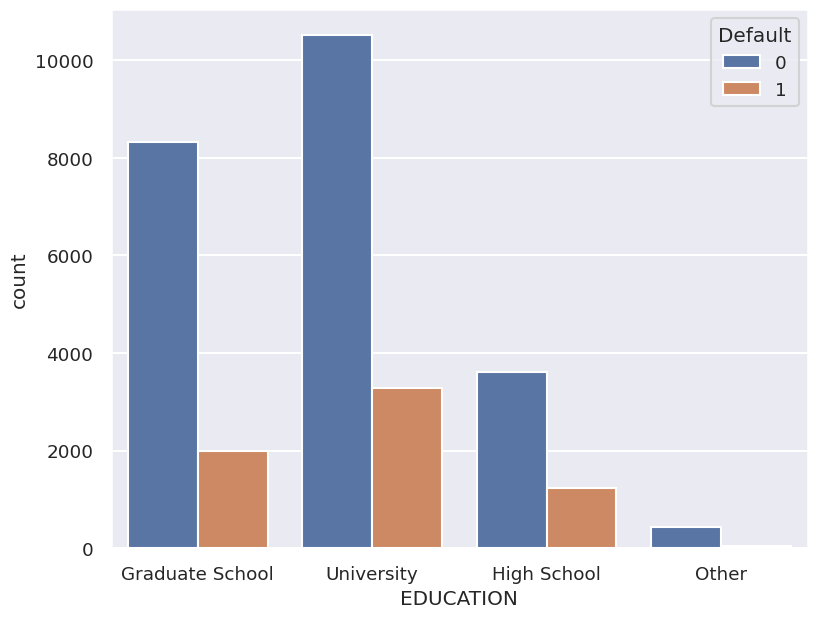

In [ ]:
# Chart - 1 visualization code
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

edu = sns.countplot(x='EDUCATION', hue='Default', data=credit_df)
edu.set_xticklabels(['Graduate School','University','High School','Other'])
plt.show()

In [ ]:
default0 = credit_df.groupby(credit_df['EDUCATION'][credit_df['Default'] == 0]).size().reset_index(name='NOT_Default')
default1 = credit_df.groupby(credit_df['EDUCATION'][credit_df['Default'] == 1]).size().reset_index(name='Default')
total = credit_df.groupby('EDUCATION').size().reset_index(name='TOTAL')

eduTable = default0.join(default1['Default']).join(total['TOTAL'])
eduTable['EDUCATION'] = ['Graduate School','University','High School','Other']
eduTable['NOT_Default'] = round((default0['NOT_Default']/total['TOTAL'])*100,2)
eduTable['Default'] = round((default1['Default']/total['TOTAL'])*100,2)

eduPct = eduTable.iloc[:,0:3]
eduPct = eduPct.rename(columns={'NOT_Default': 'NOT_Default(%)', 'Default': 'Default(%)'})

eduPct

,EDUCATION,NOT_Default(%),Default(%)
0,Graduate School,80.76,19.24
1,University,76.19,23.81
2,High School,74.71,25.29
3,Other,92.81,7.19


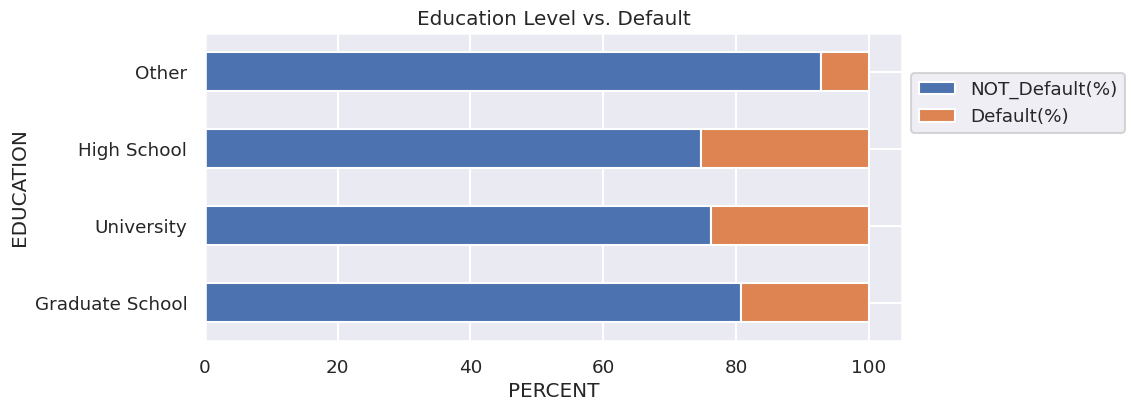

In [ ]:
sns.set(rc={'figure.figsize':(9,4)})
sns.set_context("talk", font_scale=0.8)

ax = eduPct.plot(x='EDUCATION', kind='barh', stacked=True, title='Education Level vs. Default')
ax.set_xlabel('PERCENT')
ax.get_legend().set_bbox_to_anchor((1, 0.9))
plt.show()


##### 1. Why did you pick the specific chart?

To know whether education is a factor in determining  the number of cases in  defaulting the credit card payment

##### 2. What is/are the insight(s) found from the chart?

* default count is lesser for high school ,but as per default percentage High School level have higher chance of Default.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. High school level shows high level of default, this does show the immaturity of the high school level and it is advisable not to give credits or rather there should be strict measures to taken care while giving credit

#### Chart - 2 - Gender vs default

<Axes: xlabel='SEX', ylabel='count'>

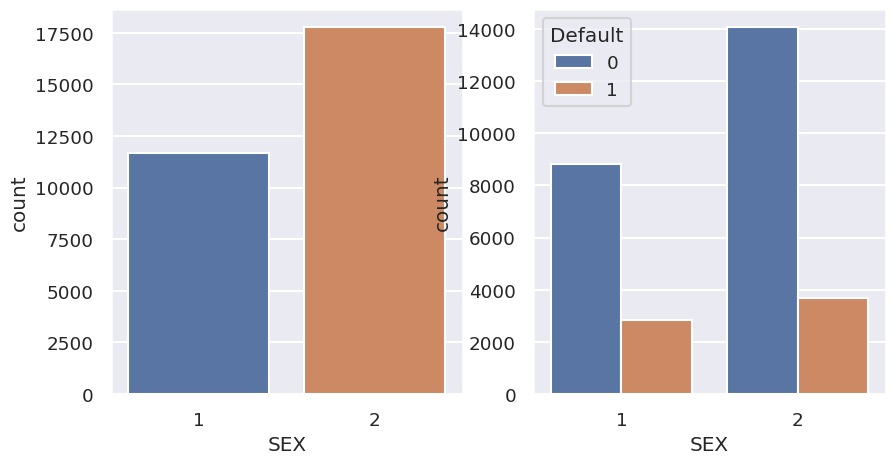

In [ ]:
# Chart - 2 visualization code
#count plot for Sex and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = credit_df)
sns.countplot(x = 'SEX', hue = 'Default',ax = axes[1], data = credit_df)


##### 1. Why did you pick the specific chart?

To understand the gender that default more 

##### 2. What is/are the insight(s) found from the chart?

* Gender female has higher number of  credit cards than male as per the data
* The default count is comparitively same for both the genders hence gender doesnot become a criteria for defaulting.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, as we found from the chart that there is no direct relatioship between gender and defaulting, so giving credits doesnot apply the feature gender

#### Chart - 3- Distribution of limit balance

Text(0.5, 1.0, 'Distribution Plot of Limit Balance')

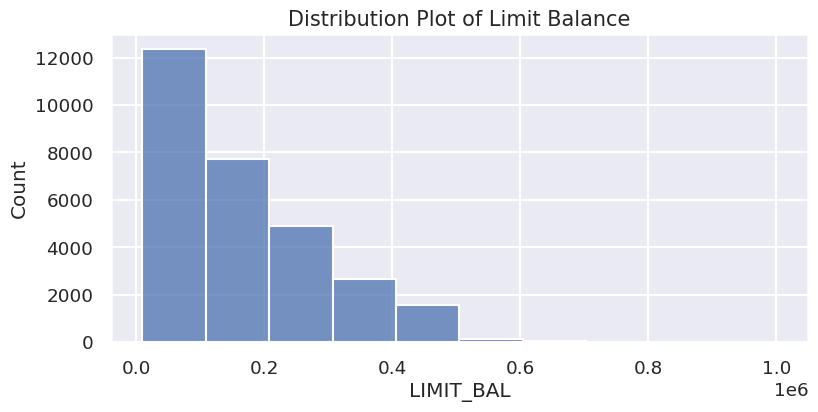

In [ ]:
# Distribution analysis of Limit Balance
hist = sns.histplot(credit_df['LIMIT_BAL'],bins=10)
hist.set_title('Distribution Plot of Limit Balance', size=15)

##### 1. Why did you pick the specific chart?

distribution of limit balance 

##### 2. What is/are the insight(s) found from the chart?

Most of the customers get up to 2 lakhs of credit limit balance.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is important to know how much limit balance shouldbe given 

#### Chart - 4 - limit bal and education level

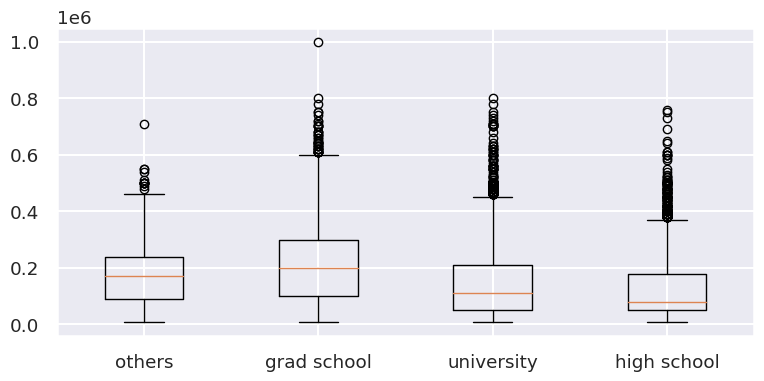

In [ ]:
# Chart - 3 visualization code
# Use boxplot to visualize credit limit grouped by education level

data = []
for i in [4,1,2,3]:
    temp = credit_df.loc[credit_df.EDUCATION == i, "LIMIT_BAL"]
    data.append(temp)

fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(["others","grad school", "university", "high school"])

plt.show()

##### 1. Why did you pick the specific chart?

credit card limit for different level of education

##### 2. What is/are the insight(s) found from the chart?

From the boxplot, we can see that customers with grad school education have the highest 25% percentile,highest median,highest 75th percentile and highest maximum numbers, which proves that customers with higher education levels did get higher credit limits.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is important to know the credit card limit to different level of education , since each level shows the maturity of how sure they gave back.

#### Chart - 5 -Limit Balance vs Sex

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

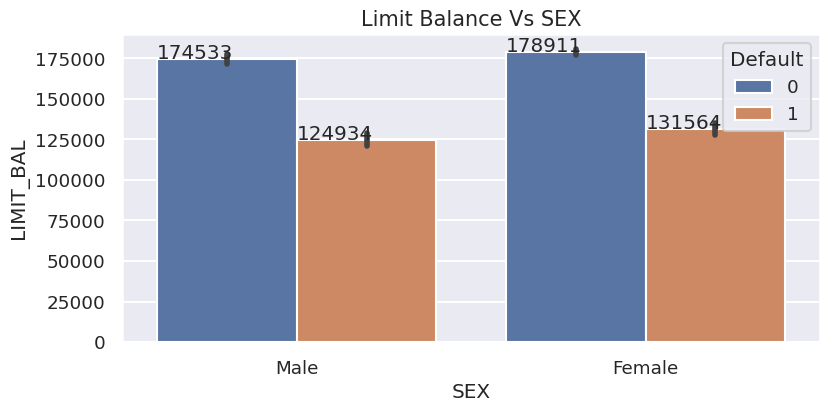

In [ ]:
# Chart - 5 visualization code
# Limit Balance Vs SEX
bar = sns.barplot(data=credit_df, x='SEX', y='LIMIT_BAL',hue='Default')
bar.set_title('Limit Balance Vs SEX', size=15)

# adding value count on the top of bar
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Assign labels to the x-axis categories   
# Gender (1=male, 2=female)          
bar.set_xticklabels(['Male', 'Female'])

##### 1. Why did you pick the specific chart?

Defaulting ratio of male and female as per the limit balance

##### 2. What is/are the insight(s) found from the chart?

Female gets more credit limits than male but the default ratio is almost same 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. As per the insights it is notable that male and female are having an average credit limit balance of 1.7 lakh

#### Chart - 6- Marital status and default payment

In [ ]:
credit_df['MARRIAGE'].value_counts()

2    15661
1    13377
3      318
0       54
Name: MARRIAGE, dtype: int64

[Text(0, 0, 'Others'),
 Text(1, 0, 'Married'),
 Text(2, 0, 'Single'),
 Text(3, 0, 'Divorce')]

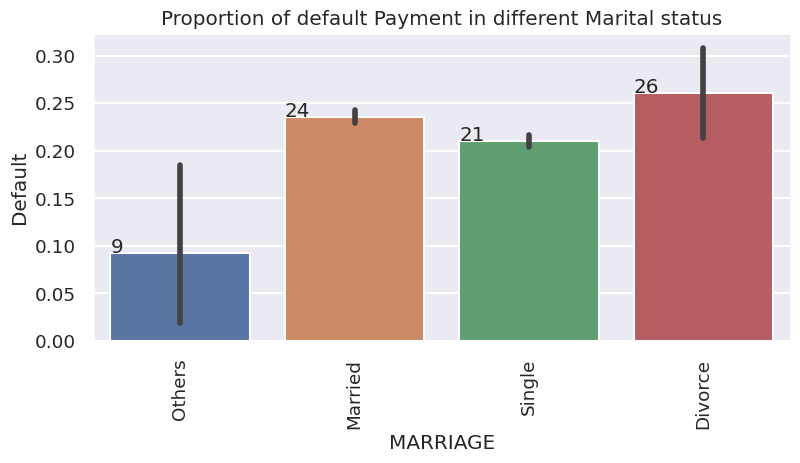

In [ ]:
# Chart - 7 visualization code
# MARRIAGE Vs Default Payment
bar = sns.barplot(data=credit_df, x='MARRIAGE', y='Default')
bar.set_title('Proportion of default Payment in different Marital status')

# adding value count on the top of bar
for p in bar.patches:
    bar.annotate(format(p.get_height()*100, '.0f'), (p.get_x(), p.get_height()))

# Assign labels to the x-axis categories   
# Marital status (1 = married; 2 = single; 3 = divorce; 0=others)          
bar.set_xticklabels(['Others','Married','Single', 'Divorce'], rotation=90)

##### 1. Why did you pick the specific chart?

proportion of default payment in different marital status

##### 2. What is/are the insight(s) found from the chart?

The number of defaults appears to be highest among divorced people (26%) and lowest among single people (21%) (ignoring "Others" due to the low count).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is a high chance of default in payment with the people who are divorced when compared to others and lowest  default payment is by singles

#### Chart - 7- Marriage vs default payment with sex

In [ ]:
# Chart - 6 visualization code
credit_df['MARRIAGE'].value_counts()

2    15661
1    13377
3      318
0       54
Name: MARRIAGE, dtype: int64

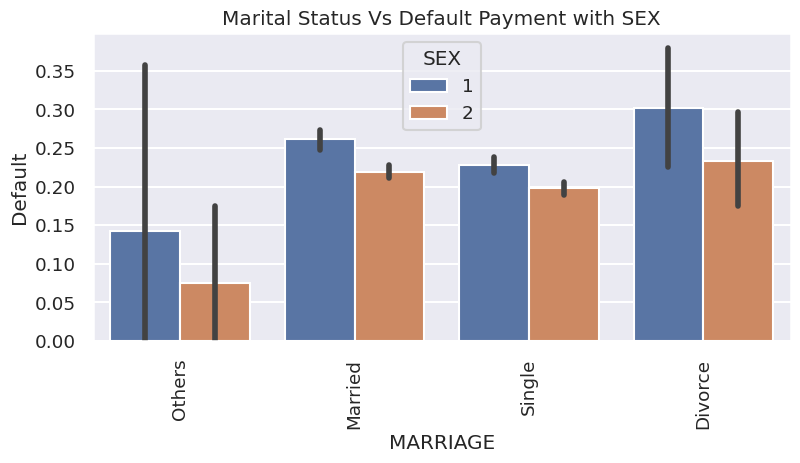

In [ ]:
# MARRIAGE Vs Default Payment with SEX
bar = sns.barplot(data=credit_df, x='MARRIAGE', y='Default', hue='SEX')
bar.set_title('Marital Status Vs Default Payment with SEX')

# Assign labels to the x-axis categories   
# Marital status (1 = married; 2 = single; 3 = divorce; 0=others)          
bar.set_xticklabels(['Others','Married','Single', 'Divorce'], rotation=90)
plt.show()
     

##### 1. Why did you pick the specific chart?

To know the default of credit card payment according to the marital status

##### 2. What is/are the insight(s) found from the chart?

In all Marital status females have less default percentage than males.

#### Chart - 8 - boxplot

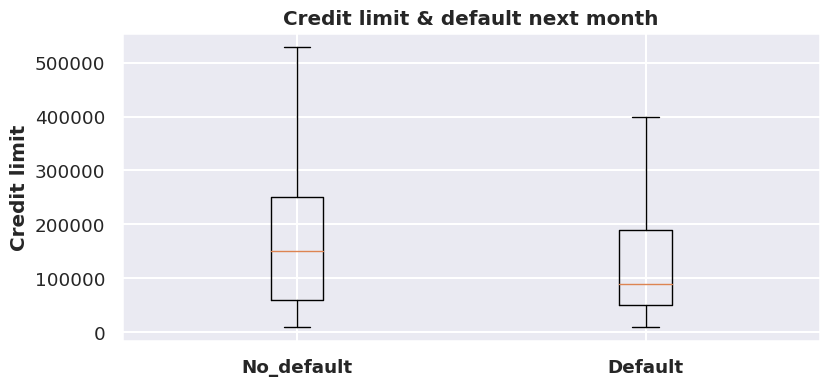

In [ ]:
# Chart - 8 visualization code
# Make a boxplot to visualize credit limit and default payment next month
# 1: default next month; 0: no default next month

default_0 = credit_df.loc[credit_df['Default'] == 0,'LIMIT_BAL']
default_1 = credit_df.loc[credit_df['Default'] == 1,'LIMIT_BAL']

fig, ax = plt.subplots()
ax.boxplot([default_0, default_1],  showfliers=False)

ax.set_xticklabels(['No_default',"Default"],fontweight ='bold')
ax.set_ylabel('Credit limit',fontweight ='bold')
ax.set_title('Credit limit & default next month',fontweight ='bold')

plt.show()

##### 1. Why did you pick the specific chart?

Selected the box plot to find the relation between the credit limit and default 

##### 2. What is/are the insight(s) found from the chart?

peeple with higher credit limit tend to avoid any default payment , that is people having credit limit tries to pay on time higher compared to customers having lower credit limit

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The amount of credit limit does matter but in a different way as we think. people having higher limit often pay back on time , eventhough they need to pay large amount of money than those having lower credit limit 

#### Chart - 9 - Age

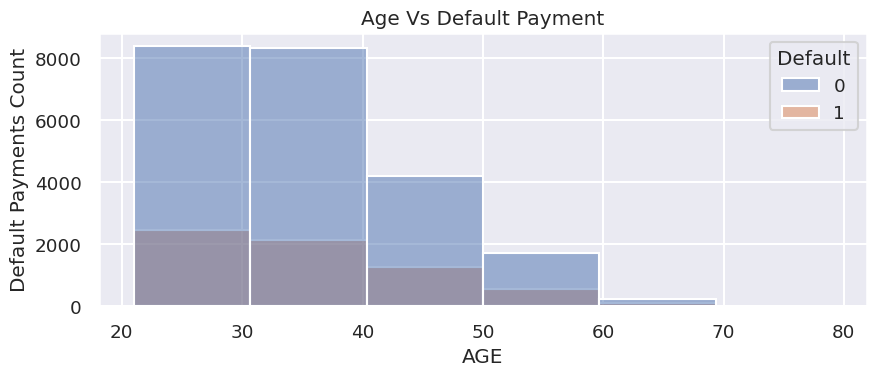

In [ ]:
# Chart - 9 visualization code
# Age Vs Default Payment
figsize=(12,12)
hist = sns.histplot(data=credit_df, x='AGE', hue='Default', bins=6)
hist.set(title='Age Vs Default Payment',ylabel='Default Payments Count')
plt.tight_layout()
plt.show()
     

##### 1. Why did you pick the specific chart?

distribution of age

##### 2. What is/are the insight(s) found from the chart?

With an increase in the age group the count of default payments decreases.

#### Chart - 10- Bill amt vs default

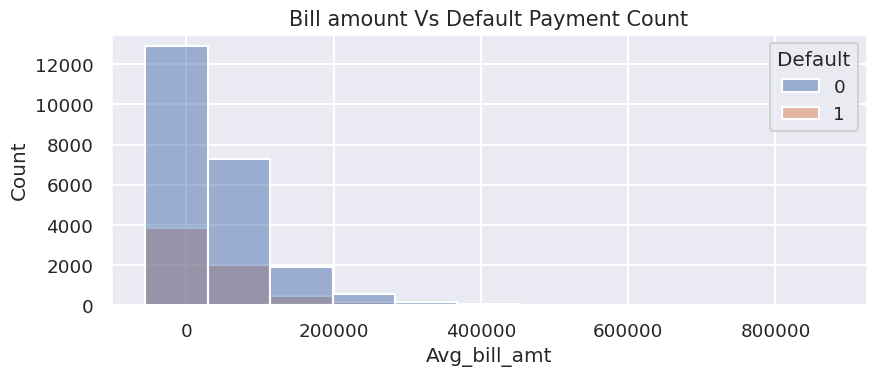

In [ ]:
# Chart - 10 visualization code

credit_df['Avg_bill_amt'] =(credit_df['BILL_AMT1']+credit_df['BILL_AMT2']+credit_df['BILL_AMT3']+credit_df['BILL_AMT4']+credit_df['BILL_AMT5']+credit_df['BILL_AMT6'])/6
# Bill amount Vs Default Payment Count
hist = sns.histplot(data=credit_df, x='Avg_bill_amt', hue='Default',bins=11)
hist.set_title('Bill amount Vs Default Payment Count', size=15)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bill amount of users

##### 2. What is/are the insight(s) found from the chart?

Most of the defaults are from customers who have negative and up to 2 lakh bill amount on an average in the last 6 months.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11 - Correlation Heatmap

In [ ]:
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default',
       'Avg_bill_amt'],
      dtype='object')

<Axes: >

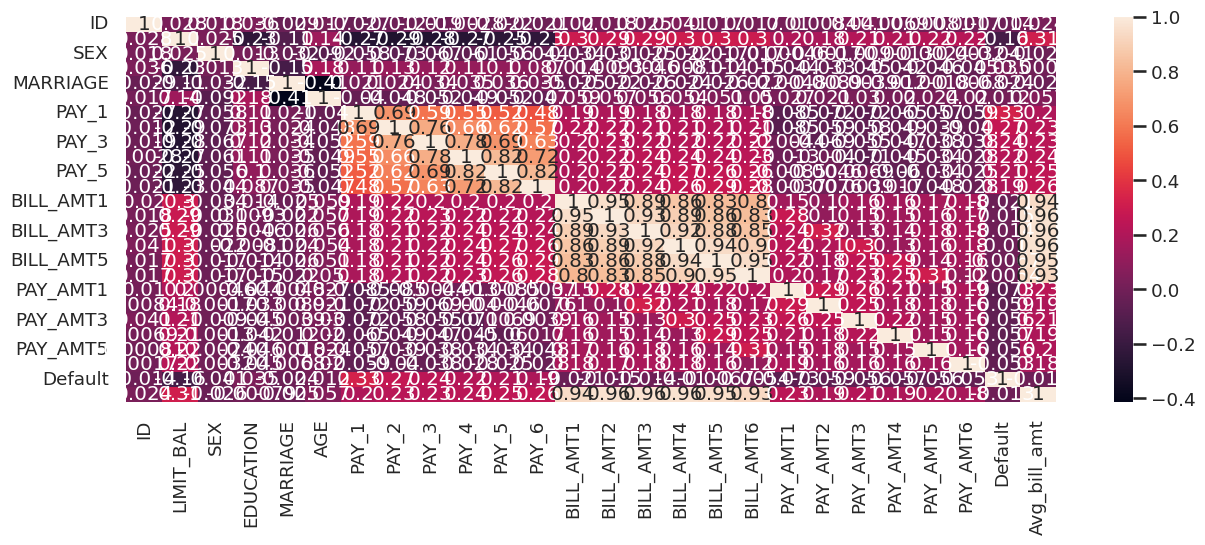

In [ ]:
# Correlation Heatmap visualization code
# Plotting correlation heatmap
plt.figure(figsize=(15,5))
sns.heatmap(credit_df.corr(), annot=True) 

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Creating a class to calculate mean, median, variance, P value and all other metrics required for the calculation of hypothesis testing.

In [ ]:
import math
from scipy.stats import *
# Creating Parameter Class 


class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value

    # Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

1. women not defaulting  are more than or equal to 40 years of AGE.
2. Customers defaulting have limit balance less than 100000.
3. Customers defaulting have total last bill amount of 30000.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: N=40 \
H1: N < 40

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
data_1 = credit_df[((credit_df['SEX']==2) & (credit_df['Default']==1))]

In [ ]:
# Getting the required parameter values for hypothesis testing
hypothesis_number = 40
sample_mean = data_1["AGE"].mean()
size = len(data_1)
std=(variance(data_1["AGE"]))**0.5


In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)

# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=data_1,col="AGE")

# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 4.541892270534145e-236


##### Which statistical test have you done to obtain P-Value?

I used Z-Test as the statistical testing to get the P-Value, and the results showed that the null hypothesis  be rejected, and female customers who not defaulted were over 40 years old.



##### Why did you choose the specific statistical test?

In [ ]:
mean_median_difference=data_1["AGE"].mean()- data_1["AGE"].median()
print("Mean Median Difference is :-",mean_median_difference)

Mean Median Difference is :- 1.825757575757578


Because of very less mean median difference

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Customers defaulting have limit balance less than 100000 \
H0: L= 100000 \
H1: L > 100000

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
data_2=credit_df[(credit_df["Default"]==1)]

# Getting the required parameter values for hypothesis testing
hypothesis_number = 100000
sample_mean = data_2["LIMIT_BAL"].mean()
size = len(data_2)
std=(variance(data_2["LIMIT_BAL"]))**0.5

In [ ]:
sample_mean

128688.16914355753

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)

# Getting P - Value
p = p_value(z=z,tailed='r',t="true",hypothesis_number=hypothesis_number,df=data_2,col="LIMIT_BAL")

# Getting Conclusion
print(conclusion(p))
     

Null Hypothesis rejected Successfully for p = 2.364787180332397e-88


##### Which statistical test have you done to obtain P-Value?

I used T-Test as the statistical testing to get the P-Value, and the result showed that the null hypothesis was wrong and that customers who defaulted had a limit balance of less than 100,000.

##### Why did you choose the specific statistical test?

In [ ]:

mean_median_difference=data_2["LIMIT_BAL"].mean()- data_2["LIMIT_BAL"].median()
print("Mean Median Difference is :-",mean_median_difference)

Mean Median Difference is :- 38688.169143557534


here  the median is greater than the mean above 10,000. As a result, the distribution is positively skewed. Z-Test cannot be used with skewed data. So we used t test

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Customers defaulting have total last bill amount of 30000. \
H0: N=30000 \
H1: N!=30000


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
data_3=credit_df[(credit_df["Default"]==1)]

# Getting the required parameter values for hypothesis testing
hypothesis_number = 30000
sample_mean = data_3["BILL_AMT1"].mean()
size = len(data_3)
std=(variance(data_3["BILL_AMT1"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)

# Getting P - Value
p = p_value(z=z,tailed='d',t="true",hypothesis_number=hypothesis_number,df=data_3,col="BILL_AMT1")

# Getting Conclusion
print(conclusion(p))
     

Null Hypothesis rejected Successfully for p = 2.3439164432005723e-95


##### Which statistical test have you done to obtain P-Value?

I used T-Test as the statistical testing to get the P-Value, and the result showed that the null hypothesis should be rejected

##### Why did you choose the specific statistical test?

In [ ]:
mean_median_difference=data_3["BILL_AMT1"].median()- data_3["BILL_AMT1"].mean()
print("Mean Median Difference is :-",mean_median_difference)

Mean Median Difference is :- -28323.4300597518


 the distribution is positively skewed Z-Test cannot be used with skewed data.herefore, the T-test can yield better results for skewed data. So, I used the t-test

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
credit_df.isnull().sum()

ID              0
LIMIT_BAL       0
SEX             0
EDUCATION       0
MARRIAGE        0
AGE             0
PAY_1           0
PAY_2           0
PAY_3           0
PAY_4           0
PAY_5           0
PAY_6           0
BILL_AMT1       0
BILL_AMT2       0
BILL_AMT3       0
BILL_AMT4       0
BILL_AMT5       0
BILL_AMT6       0
PAY_AMT1        0
PAY_AMT2        0
PAY_AMT3        0
PAY_AMT4        0
PAY_AMT5        0
PAY_AMT6        0
Default         0
Avg_bill_amt    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There isnt any null values

### 2. Handling Outliers

In [ ]:
# splitting data into numerical and categorical features for future conveniance
numerical_features = []
categorical_features = []
for i in credit_df.columns:
  if credit_df[i].nunique() > 15:
    numerical_features.append(i)
  else:
    categorical_features.append(i)
print(f'numerical features are {numerical_features}')
print(f'categorical features are {categorical_features}')

numerical features are ['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Avg_bill_amt']
categorical features are ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Default']


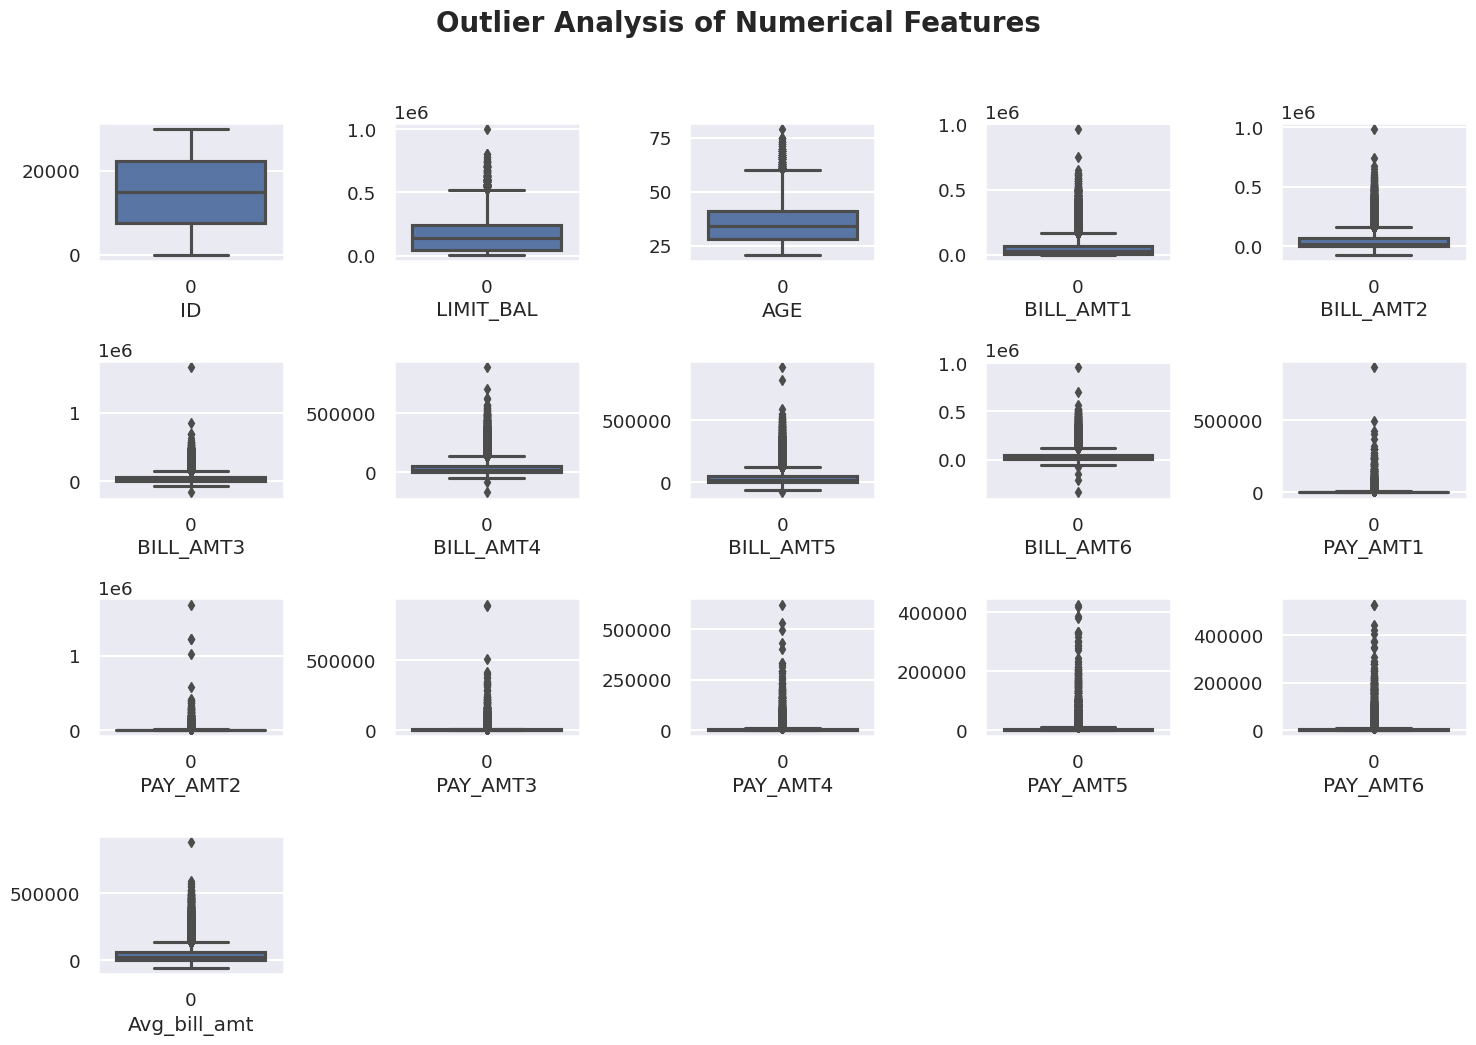

In [ ]:
# figsize
plt.figure(figsize=(15,12))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(5, 5, i+1)            # subplot of 4 rows and 5 columns

  # countplot
  sns.boxplot(credit_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()
     

There are several outliers present in th data . Outliers can be visualised as the dots outside the whiskers in the boxplots. The majority of the continuous variables seem to contain outliers. we are doing capping here to remove the outliers

In [ ]:
# we are going to replace the datapoints with upper and lower bound of all the outliers

def capping_outliers(credit_df):
    for col in credit_df[numerical_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = credit_df[col].quantile(0.25)
        q3 = credit_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # replacing the outliers with upper and lower bound
        credit_df[col] = credit_df[col].clip(lower_bound, upper_bound)
    return credit_df

In [ ]:
# using the function to treat outliers
credit_df = capping_outliers(credit_df)

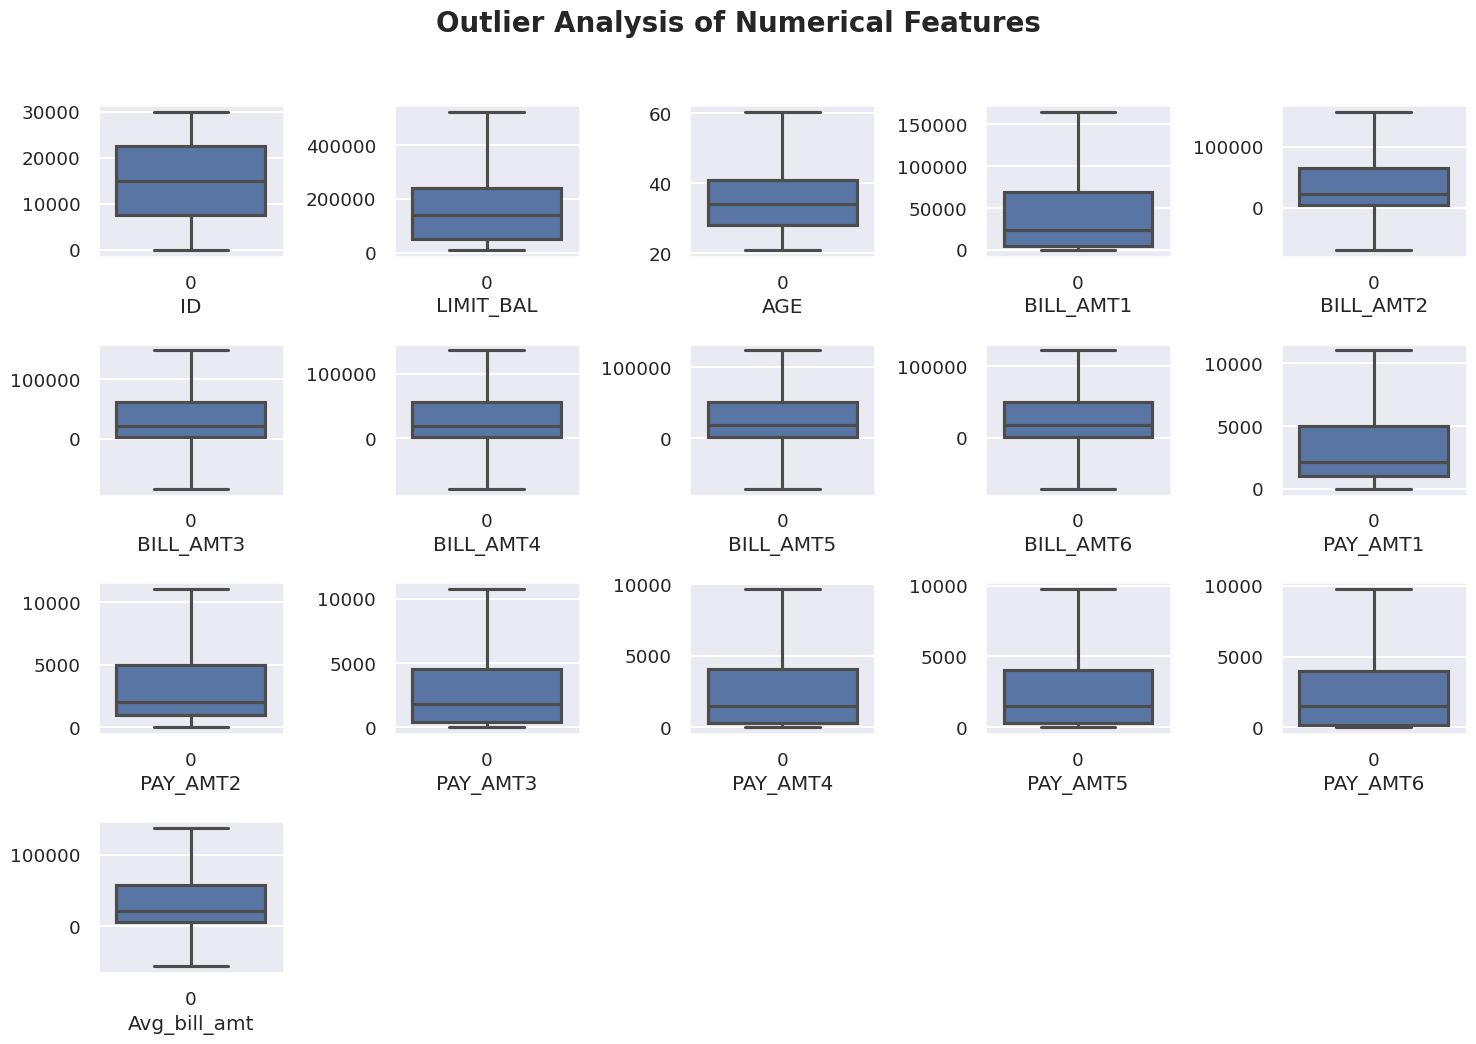

In [ ]:
# checking the boxplot after outlier treatment

# figsize
plt.figure(figsize=(15,12))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(5, 5, i+1)            # subplot of 4 rows and 5 columns

  # countplot
  sns.boxplot(credit_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

We have used capping method . in this method we are putting cap on outliers data , means if a value higher or lower than a certain threshold value, it is considered as oultiers and replacing those values with the lower bound value or upper bound value as per the nature of values.


### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29410 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            29410 non-null  int64  
 1   LIMIT_BAL     29410 non-null  int64  
 2   SEX           29410 non-null  int64  
 3   EDUCATION     29410 non-null  int64  
 4   MARRIAGE      29410 non-null  int64  
 5   AGE           29410 non-null  float64
 6   PAY_1         29410 non-null  int64  
 7   PAY_2         29410 non-null  int64  
 8   PAY_3         29410 non-null  int64  
 9   PAY_4         29410 non-null  int64  
 10  PAY_5         29410 non-null  int64  
 11  PAY_6         29410 non-null  int64  
 12  BILL_AMT1     29410 non-null  int64  
 13  BILL_AMT2     29410 non-null  float64
 14  BILL_AMT3     29410 non-null  float64
 15  BILL_AMT4     29410 non-null  float64
 16  BILL_AMT5     29410 non-null  float64
 17  BILL_AMT6     29410 non-null  float64
 18  PAY_AMT1      29410 non-nu

#### What all categorical encoding techniques have you used & why did you use those techniques?

All the data in here either int or float , so there isnt any need of categorical encoding. we just need to change the datatype to object

In [ ]:
categorical_features.remove('Default')

In [ ]:
credit_df[categorical_features] = credit_df[categorical_features].astype(str)

In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29410 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            29410 non-null  int64  
 1   LIMIT_BAL     29410 non-null  int64  
 2   SEX           29410 non-null  object 
 3   EDUCATION     29410 non-null  object 
 4   MARRIAGE      29410 non-null  object 
 5   AGE           29410 non-null  float64
 6   PAY_1         29410 non-null  object 
 7   PAY_2         29410 non-null  object 
 8   PAY_3         29410 non-null  object 
 9   PAY_4         29410 non-null  object 
 10  PAY_5         29410 non-null  object 
 11  PAY_6         29410 non-null  object 
 12  BILL_AMT1     29410 non-null  int64  
 13  BILL_AMT2     29410 non-null  float64
 14  BILL_AMT3     29410 non-null  float64
 15  BILL_AMT4     29410 non-null  float64
 16  BILL_AMT5     29410 non-null  float64
 17  BILL_AMT6     29410 non-null  float64
 18  PAY_AMT1      29410 non-nu

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
credit_df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,Avg_bill_amt
0,1,20000,2,2,1,24.0,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1284.000000
1,2,120000,2,2,2,26.0,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,2846.166667


<Axes: >

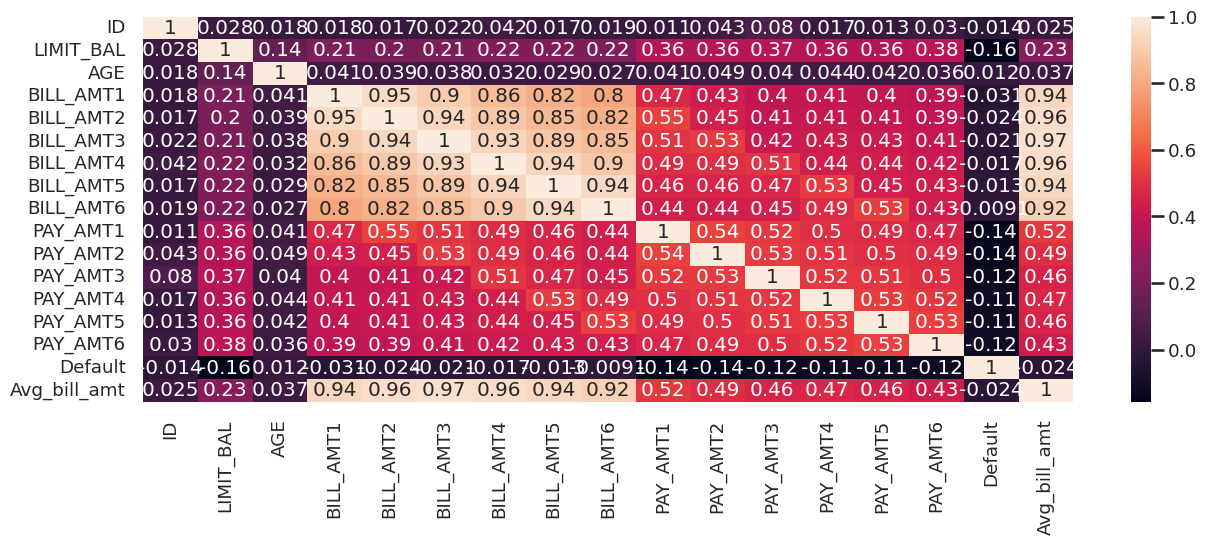

In [ ]:
# Plotting correlation heatmap
plt.figure(figsize=(15,5))
sns.heatmap(credit_df.corr(), annot=True)   

there is a high correlation between bill_amt variables, so we have to remove it leaving only one bill amt(bill_Amt1)

In [ ]:
credit_df.drop(['Avg_bill_amt','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'], axis=1, inplace=True)

<Axes: >

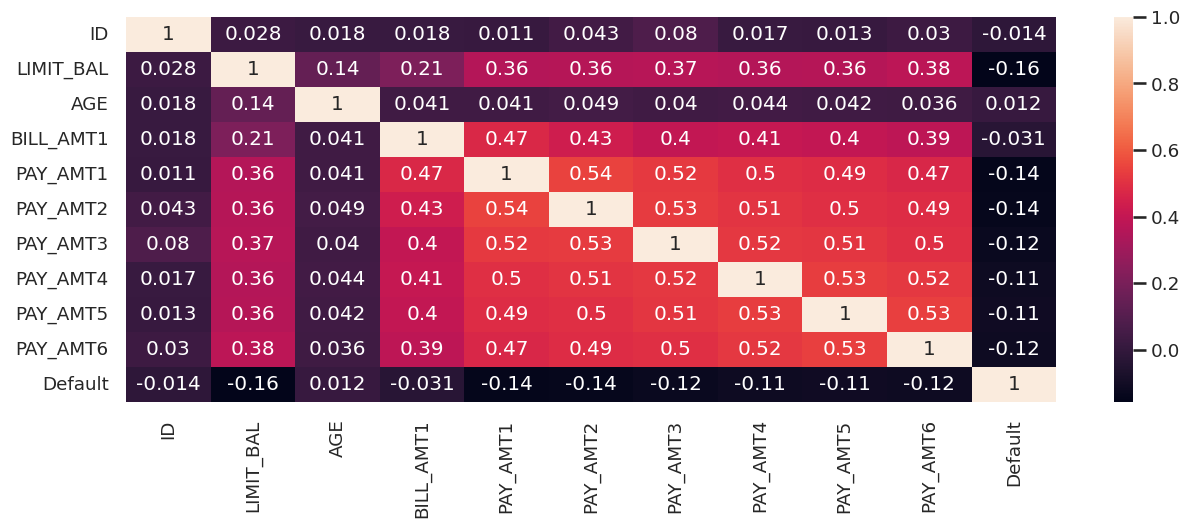

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(credit_df.corr(), annot=True) 

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
credit_df.drop('ID',axis=1,inplace=True)

##### What all feature selection methods have you used  and why?

We removed only the column which doesnot affect our final output

##### Which all features you found important and why?

The features that are important are :


In [ ]:
credit_df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
removee=['ID','Avg_bill_amt','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
for value in removee:
    if value in numerical_features:
        numerical_features.remove(value)

In [ ]:
numerical_features

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

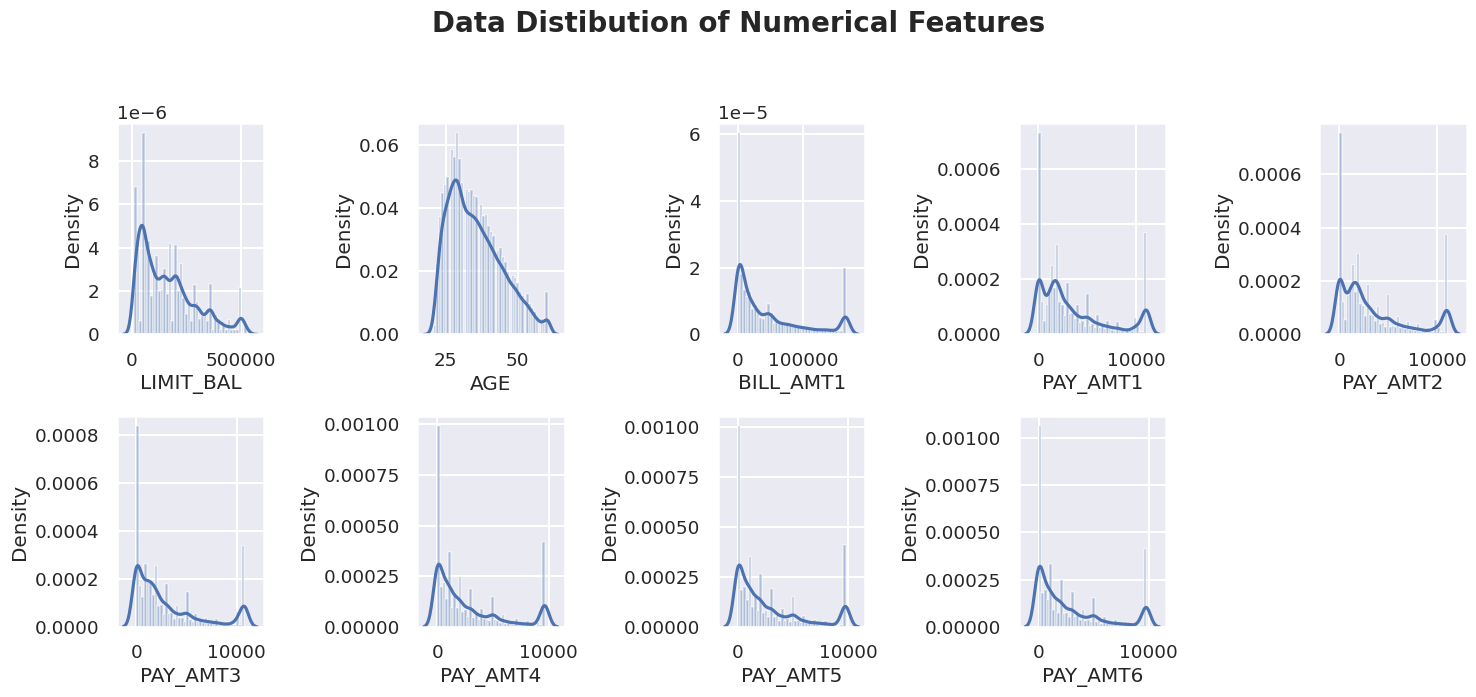

In [ ]:
# Transform Your data
plt.figure(figsize=(15,12))
plt.suptitle('Data Distibution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,colu in enumerate(numerical_features):
  plt.subplot(4, 5, i+1)                       # subplots 4 rows, 5 columns

  # dist plots
  sns.distplot(credit_df[colu])  
  # x-axis label
  plt.xlabel(colu)
  plt.tight_layout()    

<Axes: xlabel='Default', ylabel='Density'>

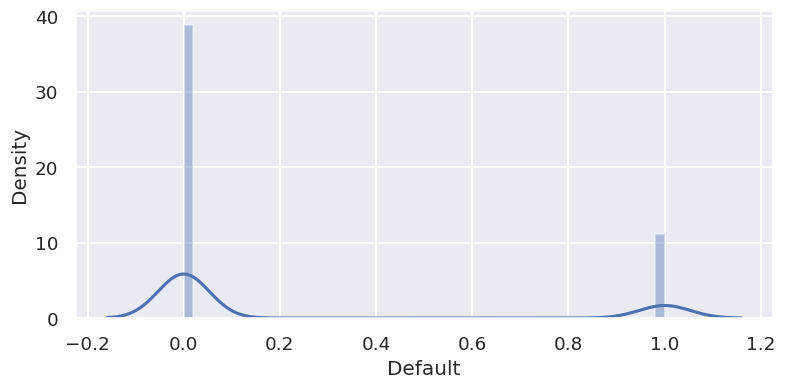

In [ ]:
 sns.distplot(credit_df['Default']) 

There isnt much to do with data transformation

### 6. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

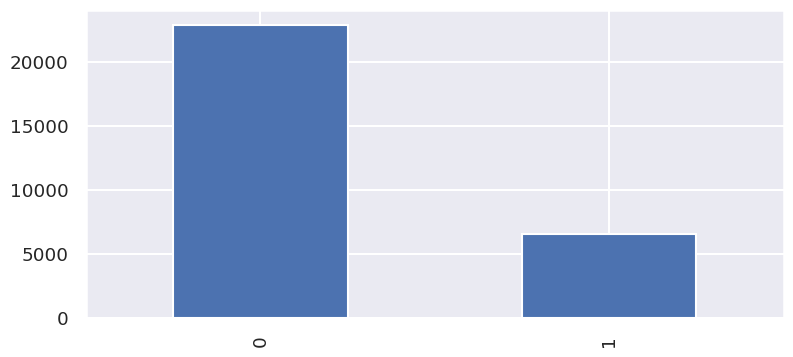

In [ ]:
# bar chart for count
credit_df['Default'].value_counts().plot(kind='bar')
plt.show()

there is a huge difference in amount of data containing default and not defaulted

In [ ]:
# Handling Imbalanced Dataset (If needed)
# we are using a technique called SMOTE to handle the imbalance of data
## Handling target class imbalance using SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

X = credit_df.drop(columns='Default')     
y = credit_df['Default']                  

print(f'Before Handling Imbalanced class {Counter(y)}')

# Resampling the minority class
smote = SMOTE(random_state=42)

# fit predictor and target variable
X, y = smote.fit_resample(X, y)

print(f'After Handling Imbalanced class {Counter(y)}')

Before Handling Imbalanced class Counter({0: 22883, 1: 6527})
After Handling Imbalanced class Counter({1: 22883, 0: 22883})


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

we used a technique called SMOTE.The SMOTE technique involves creating synthetic samples for the minority class by interpolating between existing minority class samples.

### 7. Data Splitting

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
     

(36612, 18)
(9154, 18)


##### What data splitting ratio have you used and why? 

we used a test size of 20% .

### 8. Data Scaling

In [ ]:
# Scaling your data
# Initialize the scaler

scaler = StandardScaler()

# Scale the features using StandardScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

### 9. Dimensionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

There isnt any need of dimensionality reduction since the number of columns is less

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 - logistic Regression

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)

# Fit the Algorithm
clf.fit(X_train, y_train)
# Predict on the model
train_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import accuracy_score, confusion_matrix
# Get the accuracy scores
train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6844750355074839
The accuracy on test data is  0.6844002621804676


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Compute precision
precision = precision_score(test_preds,y_test)
print("Precision:", precision) 

# Compute recall    
recall = recall_score(test_preds,y_test)
print("Recall:", recall)

# Compute F1 score
f1 = f1_score(test_preds,y_test)
print("F1 score:", f1)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_preds,y_test)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

Precision: 0.6689203925845147
Recall: 0.6910770617395223
F1 score: 0.6798182422697552
AUC: 0.6845970550427891


[[3198 1518]
 [1371 3067]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

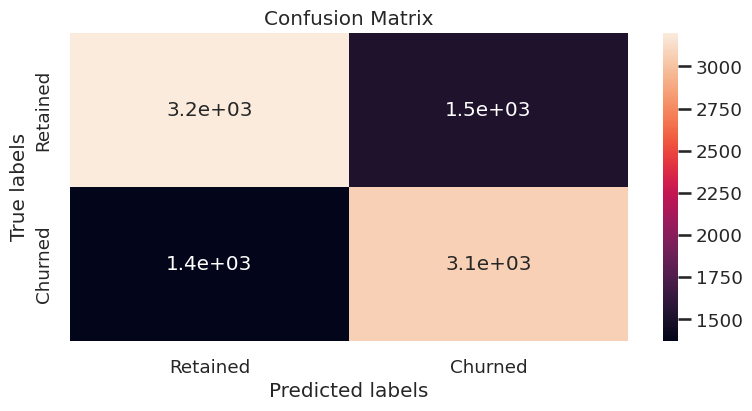

In [ ]:
labels = ['not defaulted', 'defaulted']
cm = confusion_matrix(test_preds,y_test)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(test_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      4716
           1       0.67      0.69      0.68      4438

    accuracy                           0.68      9154
   macro avg       0.68      0.68      0.68      9154
weighted avg       0.68      0.68      0.68      9154

 
roc_auc_score
0.6844273663513513


In [ ]:
# Storing model results in a dataframe for comparison
model_results = pd.DataFrame(columns=["Model", "Precision", "Recall", "F1 Score", "AUC_ROC"])

model = pd.DataFrame(
    [["Logistic Regression (original data)",  precision, recall, f1, roc_auc]],
    columns=["Model", "Precision", "Recall", "F1 Score", "AUC_ROC"],
)
model_results = model_results.append(model, ignore_index=True)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model = LogisticRegression(max_iter=10000)
solvers = ['lbfgs']
penalty = ['10','l2','14','16','20','18']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


# Predict on the model

train_cv_preds = grid_result.predict(X_train)
test_cv_preds = grid_result.predict(X_test)



Best: 0.679324 using {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
print(metrics.classification_report(train_cv_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_cv_preds))

              precision    recall  f1-score   support

           0       0.69      0.68      0.68     18568
           1       0.67      0.68      0.68     18044

    accuracy                           0.68     36612
   macro avg       0.68      0.68      0.68     36612
weighted avg       0.68      0.68      0.68     36612

 
roc_auc_score
0.681795224876477


In [ ]:
print(metrics.classification_report(test_cv_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_cv_preds))

              precision    recall  f1-score   support

           0       0.69      0.68      0.69      4631
           1       0.68      0.69      0.68      4523

    accuracy                           0.69      9154
   macro avg       0.69      0.69      0.69      9154
weighted avg       0.69      0.69      0.69      9154

 
roc_auc_score
0.6860497692834433


In [ ]:
# Compute precision
precision = precision_score(test_cv_preds, y_test)
print("Precision:", precision) 

# Compute recall    
recall = recall_score(test_cv_preds, y_test)
print("Recall:", recall)

# Compute F1 score
f1 = f1_score(test_cv_preds, y_test)
print("F1 score:", f1)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_cv_preds, y_test)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

Precision: 0.6798255179934569
Recall: 0.6891443732036259
F1 score: 0.6844532279314889
AUC: 0.6860751017389324


In [ ]:
model = pd.DataFrame(
    [["Logistic Regression (engineered data)", precision, recall, f1, roc_auc]],
    columns=["Model", "Precision", "Recall", "F1 Score", "AUC_ROC"],
)
model_results = model_results.append(model, ignore_index=True)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Not much improvement can be seen in here where roc_Auc_score increased from 0.681 to 0.686

### ML Model - 2 - Random Forest Classifier

In [ ]:
# ML Model - 3 Implementation
rf_model = RandomForestClassifier()
# Fit the Algorithm
rf_model.fit(X_train,y_train)
# Predict on the model
train_class_preds = rf_model.predict(X_train)
test_class_preds = rf_model.predict(X_test)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9995356713645799
The accuracy on test dataset is 0.8774306314179594


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[4213  356]
 [ 766 3819]]


[Text(0, 0.5, 'Not Defaulted'), Text(0, 1.5, 'Defaulted')]

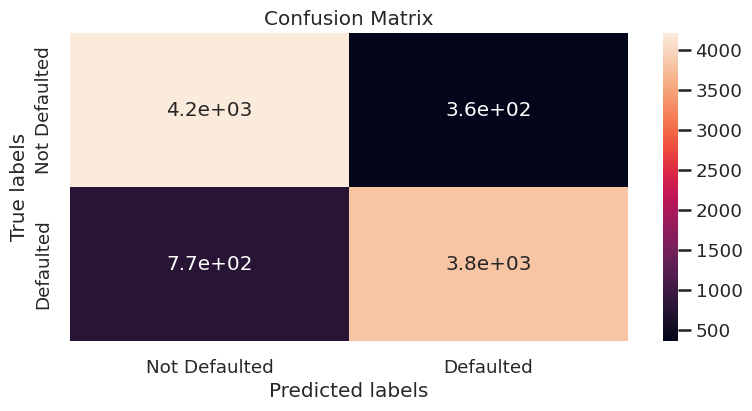

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for  test

labels = ['Not Defaulted', 'Defaulted']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      4979
           1       0.83      0.91      0.87      4175

    accuracy                           0.88      9154
   macro avg       0.88      0.88      0.88      9154
weighted avg       0.88      0.88      0.88      9154

 
roc_auc_score
0.8775085428255899


[[18304    10]
 [    7 18291]]


[Text(0, 0.5, 'not defaulted'), Text(0, 1.5, 'defaulted')]

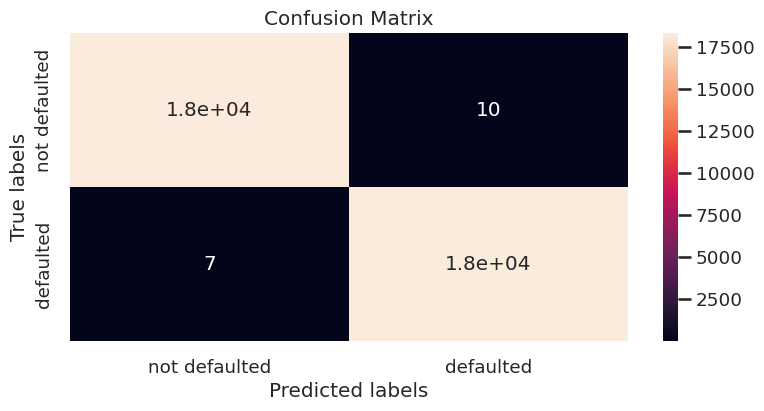

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for  train

labels = ['not defaulted', 'defaulted']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18311
           1       1.00      1.00      1.00     18301

    accuracy                           1.00     36612
   macro avg       1.00      1.00      1.00     36612
weighted avg       1.00      1.00      1.00     36612

 
roc_auc_score
0.9995357070850844


Trained model showing an accuracy score of 99 % but on test data set it is only 87 % .It will be a case of overfitting .lets tune the hyper parameters and compare it again to see any changes

In [ ]:
# Compute precision
precision = precision_score(test_class_preds, y_test)
print("Precision:", precision) 

# Compute recall    
recall = recall_score(test_class_preds, y_test)
print("Recall:", recall)

# Compute F1 score
f1 = f1_score(test_class_preds, y_test)
print("F1 score:", f1)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_class_preds, y_test)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

Precision: 0.8329334787350055
Recall: 0.9147305389221557
F1 score: 0.8719178082191782
AUC: 0.8804421925380009


In [ ]:
model = pd.DataFrame(
    [["Untuned Random Forest Model", precision, recall, f1, roc_auc]],
    columns=["Model", "Precision", "Recall", "F1 Score", "AUC_ROC"],
)
model_results = model_results.append(model, ignore_index=True)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
rf_params = {'n_estimators': [50,75],           # number of trees in the ensemble
             'max_depth': [70,80],              # maximum number of levels allowed in each tree.
             'min_samples_split': [2,5],        # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [3,4]}         # minimum number of samples which can be stored in a tree leaf.



# performing Hyperparameter Tunning using RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
rf_gridsearch = GridSearchCV(estimator=rf, param_grid=rf_params, cv=5, verbose=2, n_jobs=-1)

# model fitting 
rf_gridsearch.fit(X_train,y_train)
     

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [70, 80], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 75]},
             verbose=2)

In [ ]:
rf_gridsearch.best_estimator_

RandomForestClassifier(max_depth=70, min_samples_leaf=3, n_estimators=75,
                       random_state=42)

In [ ]:

rf_cv_model =RandomForestClassifier(max_depth=70, min_samples_leaf=3, n_estimators=75,
                       random_state=42)

In [ ]:
rf_cv_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=70, min_samples_leaf=3, n_estimators=75,
                       random_state=42)

In [ ]:
# Making predictions on train and test data
train_class_preds = rf_cv_model.predict(X_train)
test_class_preds = rf_cv_model.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['Not defaulted', 'defaulted']
cm_train = confusion_matrix(y_train, train_class_preds)
print(cm_train)
cm_test = confusion_matrix(y_test, test_class_preds)
print(cm_test)


[[17995   319]
 [ 1477 16821]]
[[4208  361]
 [ 784 3801]]


In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     19472
           1       0.92      0.98      0.95     17140

    accuracy                           0.95     36612
   macro avg       0.95      0.95      0.95     36612
weighted avg       0.95      0.95      0.95     36612

 
roc_auc_score
0.9509312136270461


In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      4992
           1       0.83      0.91      0.87      4162

    accuracy                           0.87      9154
   macro avg       0.87      0.88      0.87      9154
weighted avg       0.88      0.87      0.88      9154

 
roc_auc_score
0.8749984545702119


In [ ]:
# Compute precision
precision = precision_score(y_test, test_class_preds)
print("Precision:", precision) 

# Compute recall    
recall = recall_score(y_test, test_class_preds)
print("Recall:", recall)

# Compute F1 score
f1 = f1_score(y_test, test_class_preds)
print("F1 score:", f1)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, test_class_preds)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

Precision: 0.9132628543969246
Recall: 0.8290076335877863
F1 score: 0.8690979764490683
AUC: 0.8749984545702119


In [ ]:
model = pd.DataFrame(
    [["tuned Random forest", precision, recall, f1, roc_auc]],
    columns=["Model", "Precision", "Recall", "F1 Score", "AUC_ROC"],
)
model_results = model_results.append(model, ignore_index=True)

##### Which hyperparameter optimization technique have you used and why?

Gridsearchcv

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No Visible changes are present 

### ML Model - 3 -XGB Classifier

In [ ]:
# ML Model - 3 Implementation
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data

train_class_preds = xg_models.predict(X_train)
test_class_preds = xg_models.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[17786   528]
 [ 2404 15894]]


[Text(0, 0.5, 'Not defaulted'), Text(0, 1.5, 'defaulted')]

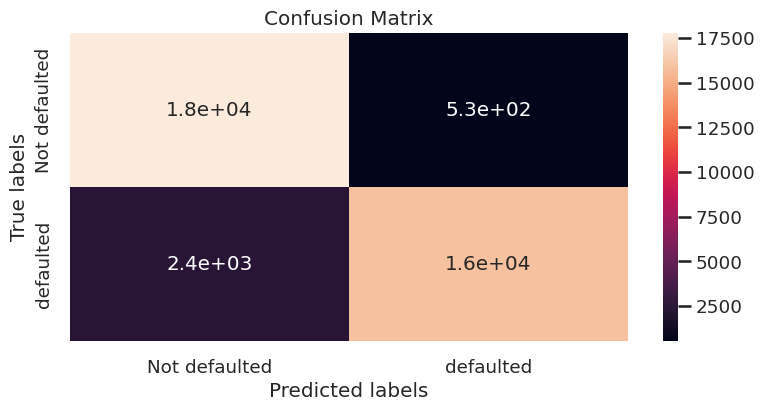

In [ ]:
# Visualizing evaluation Metric Score chart
labels = ['Not defaulted', 'defaulted']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[4257  312]
 [ 834 3751]]


[Text(0, 0.5, 'not defaulted'), Text(0, 1.5, 'defaulted')]

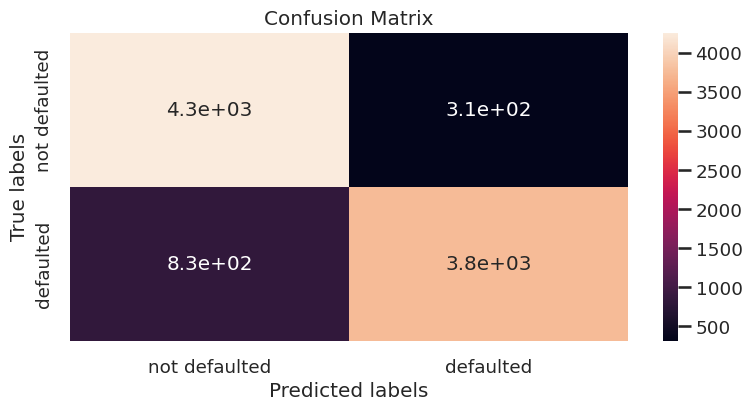

In [ ]:
labels = ['not defaulted', 'defaulted']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92     20190
           1       0.87      0.97      0.92     16422

    accuracy                           0.92     36612
   macro avg       0.92      0.92      0.92     36612
weighted avg       0.93      0.92      0.92     36612

 
roc_auc_score
0.9198945591443743


In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      5091
           1       0.82      0.92      0.87      4063

    accuracy                           0.87      9154
   macro avg       0.87      0.88      0.87      9154
weighted avg       0.88      0.87      0.88      9154

 
roc_auc_score
0.8749081155470714


In [ ]:
# Compute precision
precision = precision_score(y_test, test_class_preds)
print("Precision:", precision) 

# Compute recall    
recall = recall_score(y_test, test_class_preds)
print("Recall:", recall)

# Compute F1 score
f1 = f1_score(y_test, test_class_preds)
print("F1 score:", f1)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, test_class_preds)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

Precision: 0.9232094511444745
Recall: 0.818102508178844
F1 score: 0.8674838112858464
AUC: 0.8749081155470714


In [ ]:
model = pd.DataFrame(
    [["XGB Classifier", precision, recall, f1, roc_auc]],
    columns=["Model", "Precision", "Recall", "F1 Score", "AUC_ROC"],
)
model_results = model_results.append(model, ignore_index=True)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
xgb_params = {'n_estimators': [75,100],    # number of trees in the ensemble
          'max_depth': [6,9],            # maximum number of levels allowed in each tree.
          'min_samples_split': [5,7],    # minimum number of samples necessary in a node to cause node splitting.
          'min_samples_leaf': [6,8],     # minimum number of samples which can be stored in a tree leaf.
          'learning_rate':[0.1]}         # optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.


# performing Hyperparameter Tunning using GridSearchCV
xgb = XGBClassifier()
xgb_gridsearch = GridSearchCV(estimator=xgb, param_grid=xgb_params, cv=5, n_jobs=-1, verbose=2)

# model fitting
xgb_gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[04:36:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [6, 9],
                         'min_samples_leaf': [6, 8],
                         'min_samples_split': [5, 7],
                         'n_estimators': [75, 100]},
             verbose=2)

In [ ]:
xgb_gridsearch.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, min_samples_leaf=6, min_samples_split=5,
              missing=nan, monotone_constraints=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
print("Best: %f using %s" % (xgb_gridsearch.best_score_, xgb_gridsearch.best_params_))

Best: 0.879629 using {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
xgb_cv_model=XGBClassifier(learning_rate= 0.1, max_depth= 6, min_samples_leaf = 6, min_samples_split = 5, n_estimators= 100)

In [ ]:
xgb_cv_model.fit(X_train,y_train)

[04:36:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, min_samples_leaf=6, min_samples_split=5,
              missing=nan, monotone_constraints=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
#making predictions on train and test data
train_cv_preds=xgb_cv_model.predict(X_train)
test_cv_preds=xgb_cv_model.predict(X_test)

[[17480   834]
 [ 3185 15113]]


[Text(0, 0.5, 'Not defaulted'), Text(0, 1.5, 'defaulted')]

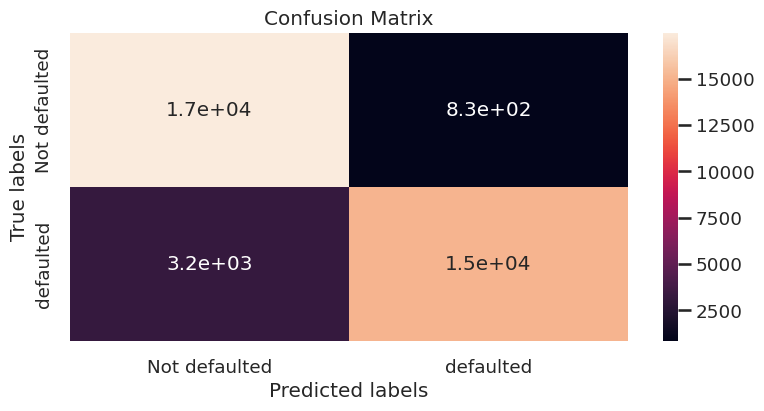

In [ ]:
labels = ['Not defaulted', 'defaulted']
cm = confusion_matrix(y_train, train_cv_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[4296  273]
 [ 849 3736]]


[Text(0, 0.5, 'Not defaulted'), Text(0, 1.5, 'defaulted')]

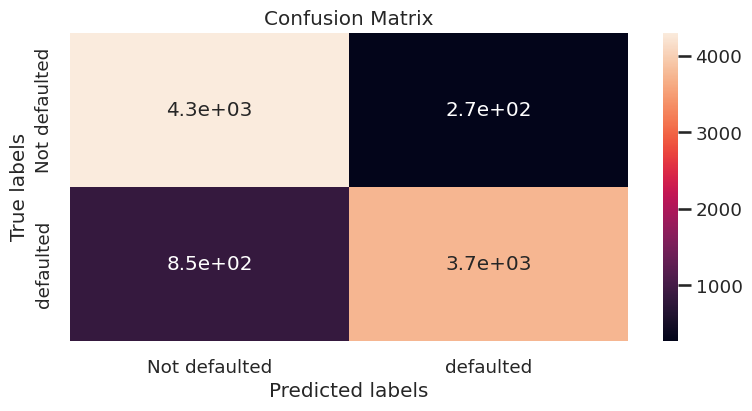

In [ ]:
labels = ['Not defaulted', 'defaulted']
cm = confusion_matrix(y_test, test_cv_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report( train_cv_preds,y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_cv_preds))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90     20665
           1       0.83      0.95      0.88     15947

    accuracy                           0.89     36612
   macro avg       0.89      0.90      0.89     36612
weighted avg       0.90      0.89      0.89     36612

 
roc_auc_score
0.8901991644691069


In [ ]:
print(metrics.classification_report( test_cv_preds,y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score( y_test,test_cv_preds))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      5145
           1       0.81      0.93      0.87      4009

    accuracy                           0.88      9154
   macro avg       0.88      0.88      0.88      9154
weighted avg       0.89      0.88      0.88      9154

 
roc_auc_score
0.8775402390535239


In [ ]:
# Compute precision
precision = precision_score(y_test,test_cv_preds)
print("Precision:", precision) 

# Compute recall    
recall = recall_score(y_test,test_cv_preds)
print("Recall:", recall)

# Compute F1 score
f1 = f1_score(y_test,test_cv_preds)
print("F1 score:", f1)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test,test_cv_preds)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

Precision: 0.9319032177600399
Recall: 0.8148309705561614
F1 score: 0.8694437979986037
AUC: 0.8775402390535239


In [ ]:
model = pd.DataFrame(
    [["XGB (cv) Classifier", precision, recall, f1, roc_auc]],
    columns=["Model", "Precision", "Recall", "F1 Score", "AUC_ROC"],
)
model_results = model_results.append(model, ignore_index=True)

##### Which hyperparameter optimization technique have you used and why?

here also we have used gridsearchcv, since it is easy to use and dataset is not too that large

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model -4- KNN

In [ ]:
# ML Model - 1 Implementation
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
knn_cv.best_score_

0.8235154630166113

In [ ]:
knn_cv.best_params_

{'n_neighbors': 1}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
    
# Fit the model
knn.fit(X_train, y_train)
    
# Compute accuracy on the training set
train_accuracy= knn.score(X_train, y_train)
    
# Compute accuracy on the test set
test_accuracy = knn.score(X_test, y_test)

In [ ]:
train_accuracy, test_accuracy

(0.9995629848137223, 0.8435656543587503)

In [ ]:
# Get the predicted classes
train_class_preds = knn.predict(X_train)
test_class_preds = knn.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[18306     8]
 [    8 18290]]


[Text(0, 0.5, 'not defaulted'), Text(0, 1.5, 'defaulted')]

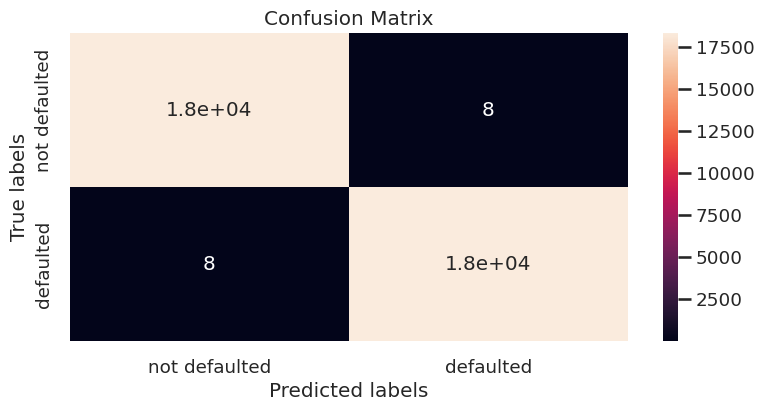

In [ ]:
# Visualizing evaluation Metric Score chart
labels = ['not defaulted', 'defaulted']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[3558 1011]
 [ 421 4164]]


[Text(0, 0.5, 'not defaulted'), Text(0, 1.5, 'defaulted')]

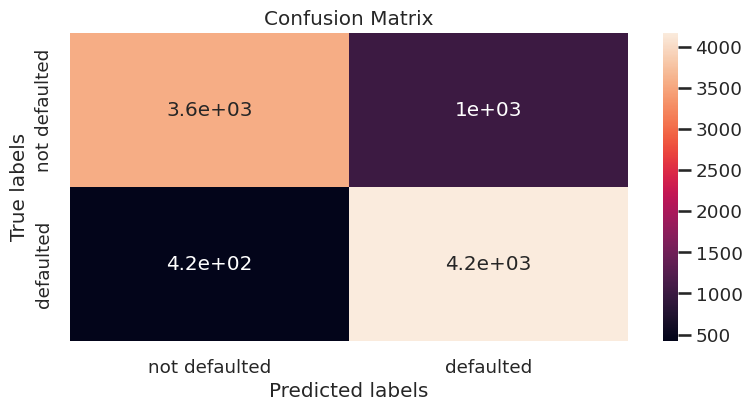

In [ ]:
labels = ['not defaulted', 'defaulted']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18314
           1       1.00      1.00      1.00     18298

    accuracy                           1.00     36612
   macro avg       1.00      1.00      1.00     36612
weighted avg       1.00      1.00      1.00     36612

 
roc_auc_score
0.9995629847302601


In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      3979
           1       0.91      0.80      0.85      5175

    accuracy                           0.84      9154
   macro avg       0.84      0.85      0.84      9154
weighted avg       0.85      0.84      0.84      9154

 
roc_auc_score
0.843452521174775


In [ ]:
# Compute precision
precision = precision_score(y_test, test_class_preds)
print("Precision:", precision) 

# Compute recall    
recall = recall_score(y_test, test_class_preds)
print("Recall:", recall)

# Compute F1 score
f1 = f1_score(y_test, test_class_preds)
print("F1 score:", f1)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, test_class_preds)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

Precision: 0.8046376811594202
Recall: 0.9081788440567067
F1 score: 0.8532786885245901
AUC: 0.843452521174775


In [ ]:

model = pd.DataFrame(
    [["KNN", precision, recall, f1, roc_auc]],
    columns=["Model", "Precision", "Recall", "F1 Score", "AUC_ROC"],
)
model_results = model_results.append(model, ignore_index=True)

In [ ]:
model_results

,Model,Precision,Recall,F1 Score,AUC_ROC
0,Logistic Regression (original data),0.668920,0.691077,0.679818,0.684597
1,Logistic Regression (engineered data),0.679826,0.689144,0.684453,0.686075
2,Untuned Random Forest Model,0.832933,0.914731,0.871918,0.880442
3,tuned Random forest,0.913263,0.829008,0.869098,0.874998
4,XGB Classifier,0.923209,0.818103,0.867484,0.874908
5,XGB (cv) Classifier,0.931903,0.814831,0.869444,0.877540
6,KNN,0.804638,0.908179,0.853279,0.843453


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

 Accuracy scores aren't very helpful when dealing with imbalanced data or classes.In order to avoid false negatives, we need to minimize situations where the model predicts that a customer will not default, when in reality, they do. In our scenario, recall should take precedence over precision. Hence, we should aim for moderate f1_score and high recall scores.The precision-recall trade-off is something that will need to be closely looked at. We could improve our recall but that would come at the cost of precision

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The ML model which i choose is untuned random forest model.When developing a machine learning model, it is generally recommended to track multiple metrics because each one highlights distinct aspects of model performance. We are, however, focusing more on the Recall score and F1 score because we are dealing with credit card data and our data is unbalanced.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
# feature importance (Random Forest)
rf_importances = rf_model.feature_importances_

#Creating a dictonary 
rf_importance_dict = {'Feature RF' : list(X.columns),
                   'Feature Importance RF' : rf_importances}

#Creating the dataframe
rf_importance = pd.DataFrame(rf_importance_dict)
rf_sorting_features = rf_importance.sort_values(by=['Feature Importance RF'],ascending=False)

In [ ]:
# feature importance (XGB)
xgb_importances = xgb_gridsearch.best_estimator_.feature_importances_

#Creating a dictonary 
xgb_importance_dict = {'Feature XGB' : list(X.columns),
                   'Feature Importance XGB' : xgb_importances}

#Creating the dataframe
xgb_importance = pd.DataFrame(xgb_importance_dict)
xgb_sorting_features = xgb_importance.sort_values(by=['Feature Importance XGB'],ascending=False)

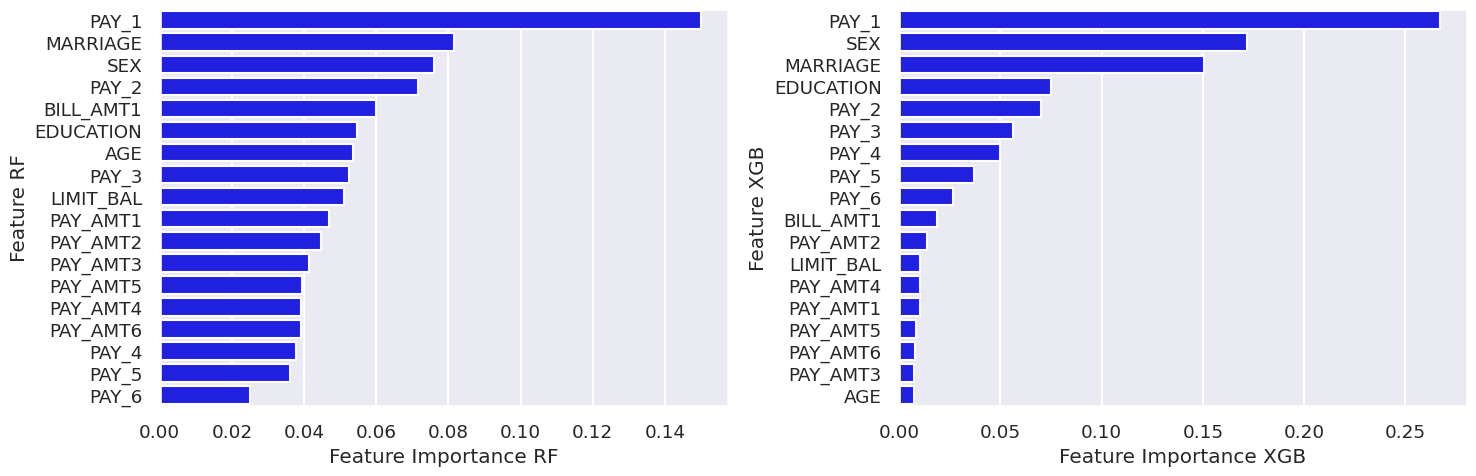

In [ ]:

# plotting feature importance graph
fig,ax = plt.subplots(1,2, figsize=(15,5))
bar = sns.barplot(x='Feature Importance RF', y='Feature RF', data=rf_sorting_features, color='blue', ax=ax[0])
bar = sns.barplot(x='Feature Importance XGB', y='Feature XGB', data=xgb_sorting_features, color='blue', ax=ax[1])


plt.tight_layout()
plt.show()

features like pay_1 , marriage for the model random forest is very important. For an example the feature PAY_1 have the highest importance in predicting and its feature importance is twice than any other features

# **Conclusion**

In this project, we tackled a classification problem in which we had to classify and predict whether a credit card holder is likely to default on their payments. This problem is important for credit card companies, as it allows them to identify risky borrowers and take appropriate measures to minimize their losses.There were 30000 records and 25 attributes in the dataset.
We started by importing the dataset, and necessary libraries and conducted exploratory data analysis (EDA) to get a clear insight into each feature by separating the dataset into numeric and categoric features. We did Univariate, Bivariate, and even multivariate analyses.
After that, the outliers and null values were checked from the raw data. Data were transformed to ensure that it was compatible with machine learning models.

* After that we did feature manipulation, feature selection .And then we handled the class imbalance using the smote technique
* When developing a machine learning model, it is generally recommended to track multiple metrics because each one highlights distinct aspects of model performance. We are, however, focusing more on the Recall score and F1 score because we are dealing with credit card data and our data is unbalanced.
* Our highest recall score, 0.91, came from Random Forest model.

As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***